# Bibliothek importieren

In [1]:
import torch
import numpy as np

In [2]:
x = torch.randn(3, requires_grad=True)
display(x)

y = x + 2 
display(y)


tensor([-0.1209, -0.3335, -0.9374], requires_grad=True)

tensor([1.8791, 1.6665, 1.0626], grad_fn=<AddBackward0>)

Was passiert?


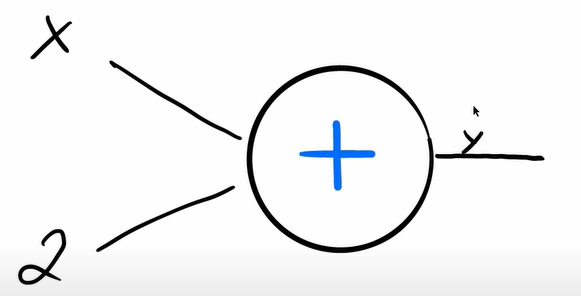


Fuer was wir requires_grad brauchen? 

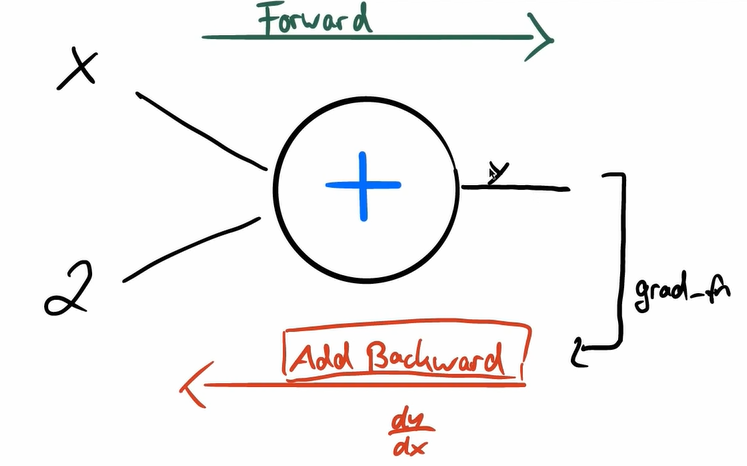

In [8]:
z = y * y * 2
display(z)

z = z.mean()
display(z)

# calculate the gradients
z.backward()  # dz/dx
display(x.grad)


tensor([7.0623, 5.5541, 2.2582], grad_fn=<MulBackward0>)

tensor(4.9582, grad_fn=<MeanBackward0>)

tensor([ 8.2682, 13.3316,  4.2508])

Jacobimatrix

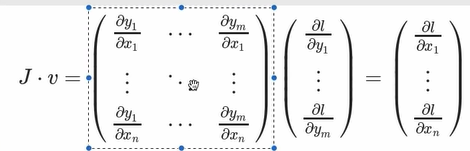

In [12]:
z = y * y * 2
display(z)

v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)

z.backward(v) # dz/dx
display(x.grad)


tensor([7.0623, 5.5541, 2.2582], grad_fn=<MulBackward0>)

tensor([ 9.0199, 19.9974,  4.2551])

# Stop autograd from tracking history on Tensors

In [15]:
x = torch.randn(3, requires_grad=True)
display(x)

# set requires_grad=False to stop tracking the history
x.requires_grad_(False)
display(x)

tensor([-2.4217, -1.3284, -1.5120], requires_grad=True)

tensor([-2.4217, -1.3284, -1.5120])

In [16]:
x = torch.randn(3, requires_grad=True)
display(x)

y = x.detach()
display(y)

tensor([1.0235, 0.5018, 2.1201], requires_grad=True)

tensor([1.0235, 0.5018, 2.1201])

In [17]:
x = torch.randn(3, requires_grad=True)
display(x)

with torch.no_grad():
    y = x + 2
    display(y)  

tensor([-0.1416, -1.4060,  1.8075], requires_grad=True)

tensor([1.8584, 0.5940, 3.8075])

# Weights are summing! 

In [22]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(6):
    model_output = (weights * 3).sum()

    model_output.backward()

    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])
tensor([15., 15., 15., 15.])
tensor([18., 18., 18., 18.])


# How to correct it

In [23]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(6):
    model_output = (weights * 3).sum()

    model_output.backward()

    print(weights.grad)

    weights.grad.zero_()



tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Anwendung

In [26]:
weights = torch.ones(4, requires_grad=True)

optimizer = torch.optim.SGD(weights, lr=0.01)
optimizer.step()
optimizer.zero_grad()

TypeError: params argument given to the optimizer should be an iterable of Tensors or dicts, but got torch.FloatTensor